In [1]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\mahta\OneDrive - Georgia Institute of Technology\Documents\GitHub\Bank\SDS-CP038-banktermpredict\.venv\Scripts\python.exe
3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]


**BankTermPredict Project :
** This dataset collected by a Portugese banking instutition and the goal is that to predict whether a client will subscribe to a term deposit or not
Purpose : this is a supervised learning project and the goal is to predict if the client will subscribe (yes/no) to term deposit (variable ).

Data Dictionary


Part 1 - Data Preprocessing 
Importing the dataset 

Import all alibreries that are needed in this project 

In [2]:
# Import All Libraries Used in this Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix, 
    classification_report
)
import joblib, json
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import iqr
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
dataset_path = Path("data") / "bank-full.csv"

if not dataset_path.exists():
    raise FileNotFoundError(f"{dataset_path} not found. Check the file name and folder.")

df = pd.read_csv(dataset_path, sep=";")
df.head(30)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# Number of rows and colums thorough shape 
print("Shape of the dataset: ")
df.shape

Shape of the dataset: 


(45211, 17)

In [5]:
print ('Info of the dataset: ')
df.info()

Info of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB



##### Manage missing value, duplicates


In [6]:
# 1.verify NA/Nan value 
missing_value = df.isnull().sum()
print("Missing values in each column: ")
print(missing_value)

Missing values in each column: 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
#2. Verify unstructured missing values (e.g., '?', 'NA', 'NaN',empty strings, placeholders)
print("Unstructured missing values in each column: ")
for col in df.columns:
    print(f"{col}: {df[col].isin(["", "NA", "N/A", "null", "NULL", "na", "n/a", "Null", "None", "none"]).sum()}")

Unstructured missing values in each column: 
age: 0
job: 0
marital: 0
education: 0
default: 0
balance: 0
housing: 0
loan: 0
contact: 0
day: 0
month: 0
duration: 0
campaign: 0
pdays: 0
previous: 0
poutcome: 0
y: 0


In [8]:
#3 verify duplicates rows
duplicated_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicated_rows}")

if duplicated_rows > 0:
    df = df.drop_duplicates()
    print("Duplicate rows have been removed.")

Number of duplicate rows: 0


In [9]:
#4  check for sentinel-coded text placeholders
placeholders = {"unknown", "?", "na", "n/a", "none", "null", "-"}
for col in df.columns:
    if df[col].isin(placeholders).any():
        print(f"Sentinel-coded text placeholders found in column '{col}': {df[col].isin(placeholders).sum()}")

Sentinel-coded text placeholders found in column 'job': 288
Sentinel-coded text placeholders found in column 'education': 1857
Sentinel-coded text placeholders found in column 'contact': 13020
Sentinel-coded text placeholders found in column 'poutcome': 36959


##### EDA : feature distributions 

Histograms: Numeric Features

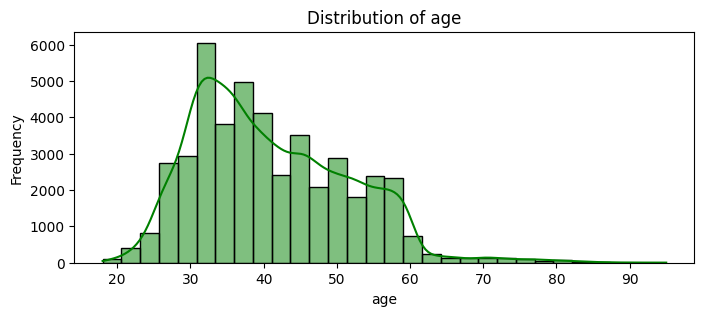

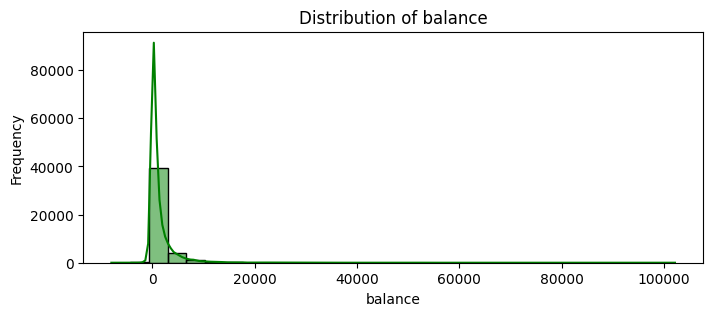

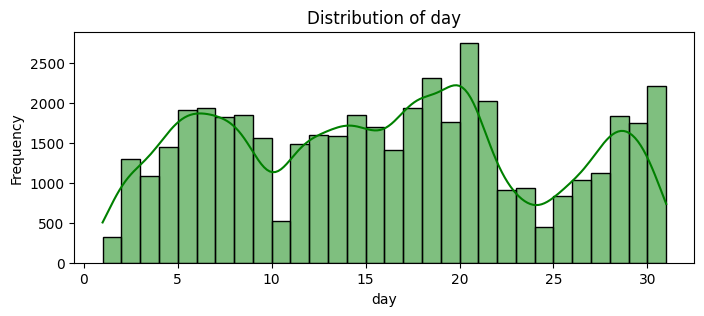

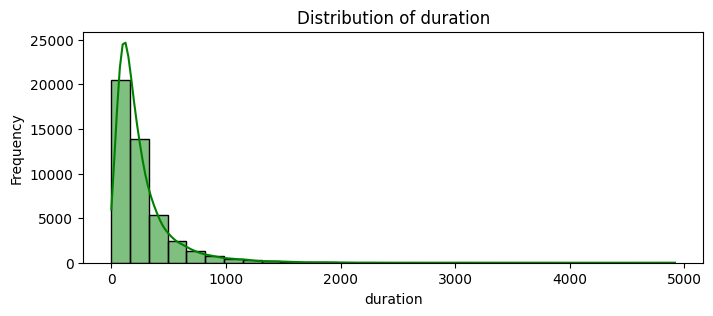

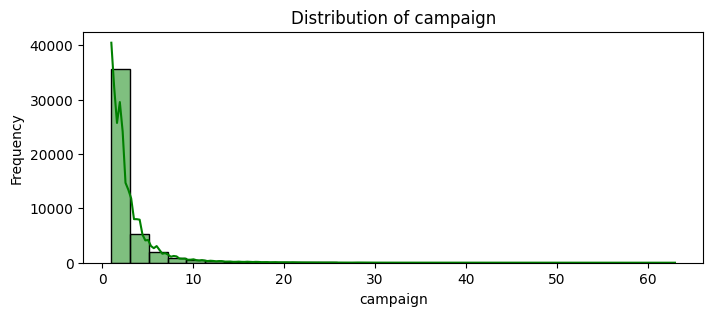

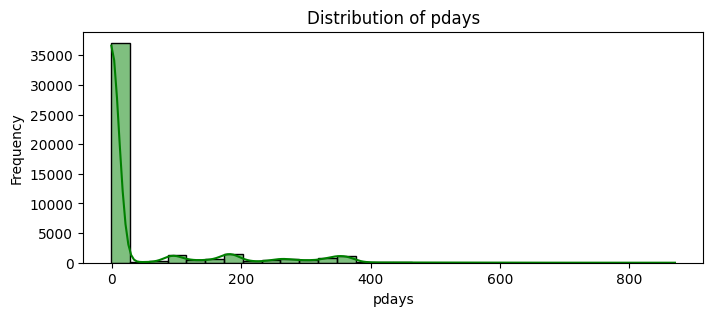

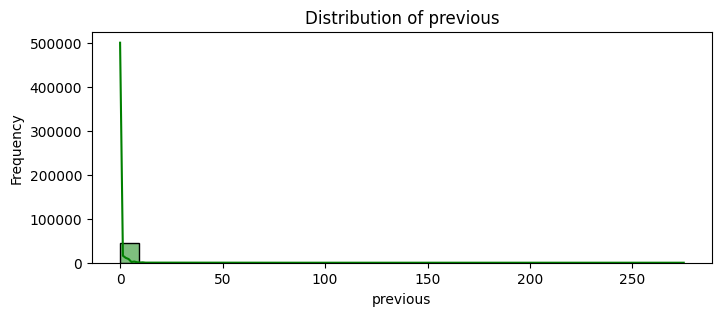

In [10]:
num_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[col].dropna(),bins=30, kde=True, color='green') 
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show() 


##### Interpretation of histograms:
- age:
  - customers range in age from 18 to 95 years, with a mean age of approximately 41 years
  - It can be seen that age is righ-skewed,centered in the 30s-40s, with fewer older customers(60+), which creates the long right tail

- balance:(average yearly balance in Eur)
  - Highly right- skewed, with most clients near zero and a long positive tail. 
  - This data also includes negative balances, which likey showa customers who are overdrawn in debt

- campaign( number of cantacts in this campaign):
  - Right-skewed , most clients were contavted only 1-3 times,and the frequency drops quickly as the number of contacts increases.
  - It would be useful for feature engineering grouping high vs. low contact counts

- duration:(last contact duration, in seconds):
  - highly right-skewed, most calls are short, and a small number are very long.
  - There are clear outliers (very long calls). These are rare but stretch the scale.

- pdays: number of days since the client was last contacted from a previous campaign.
  - About 81 % of customers had pdays = -1 meaning they were never contacted before.
  - And among the minority who were contacted before, only ~2.28% were contacted again within 30 days

- previous: number of contacts performed before this campaign and for this client 
** -  pdays vs previous:
   - The cross-tab shows a perfect relationship between these two variables.
   - For all 36,954 clients with pdays = -1, we also have previous = 0, meaning they had no prior contact before the current campaign. 
   - For all 8,257 clients with pdays ≠ -1, we have previous > 0, meaning they were contacted before in a previous campaign.
   - There are no mismatches (0 cases where one indicates prior contact and the other does not), so these features are redundant and capture the same information about prior contact.
   - In modeling, keeping both may add duplicate information; it can be reasonable to keep one (often pdays) and drop the other (previous).
   
   

In [11]:
pd.crosstab(df["pdays"].eq(-1), df["previous"].eq(0))


previous,False,True
pdays,,
False,8257,0
True,0,36954


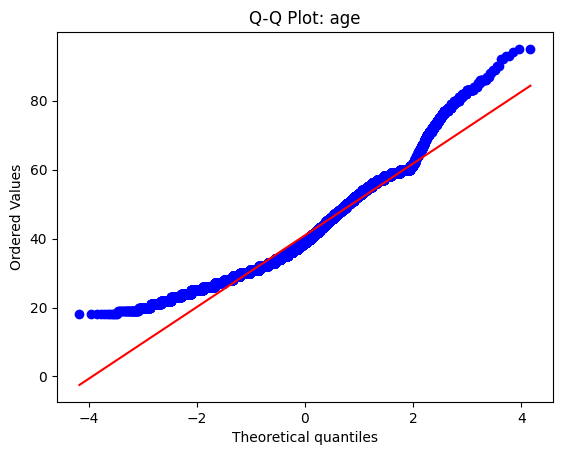

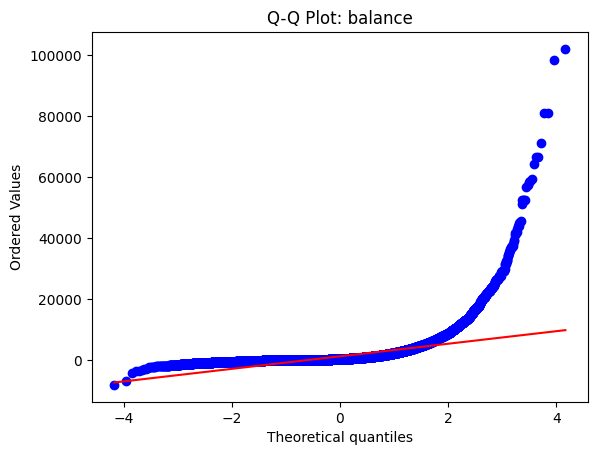

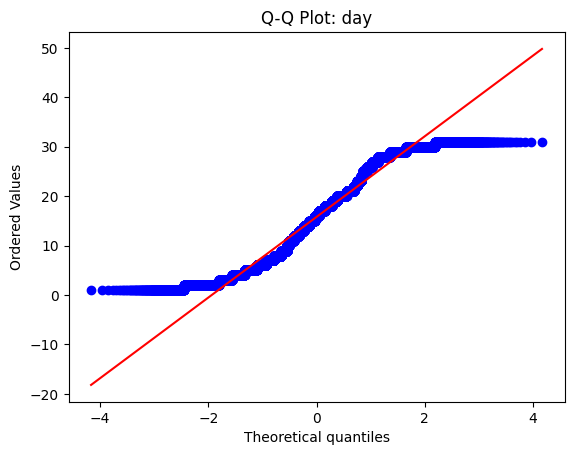

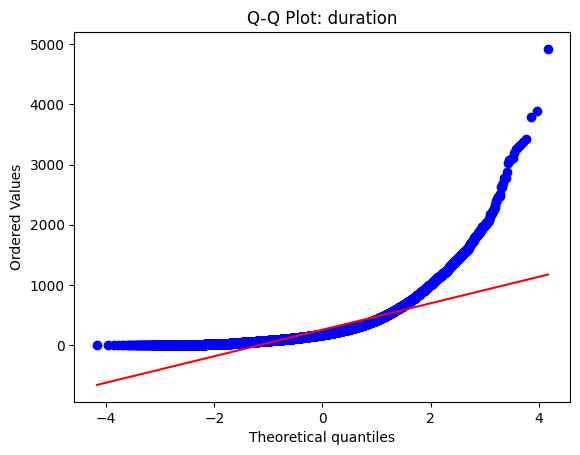

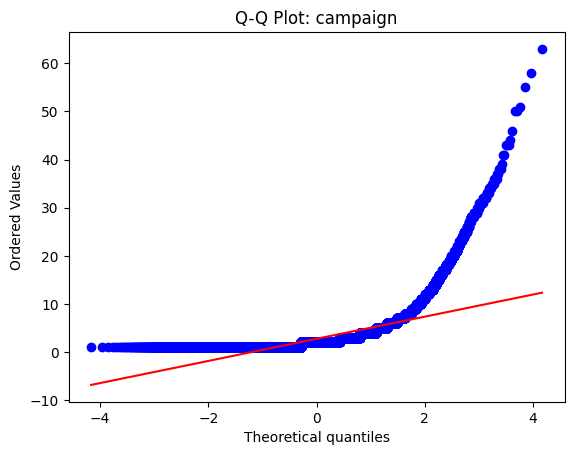

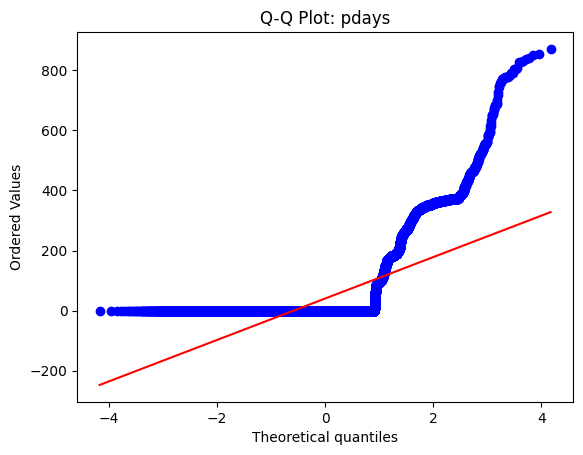

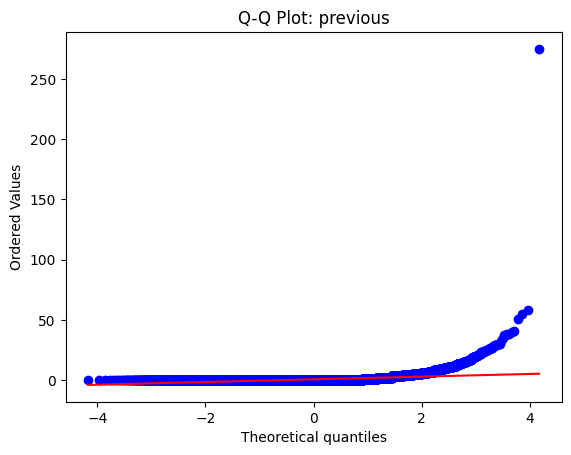

In [12]:
from scipy import stats
for col in num_cols:
    x = df[col].dropna()
    plt.figure()
    stats.probplot(x, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col}")
    plt.show()

---

##### Boxplots: Numeric Features by dependent variable  (y)
Thorough these plot we can discover how each numeric feature differs between clients who subscribed (yes) and those who didn't(no). 


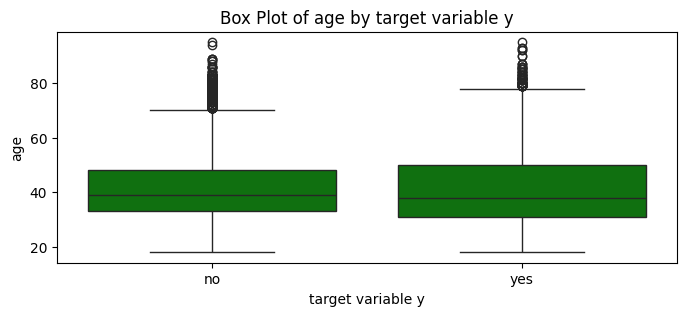

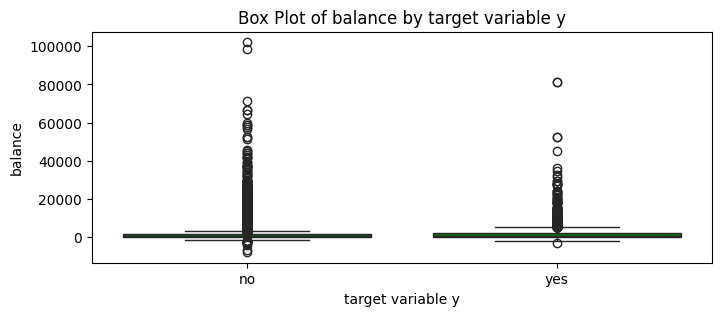

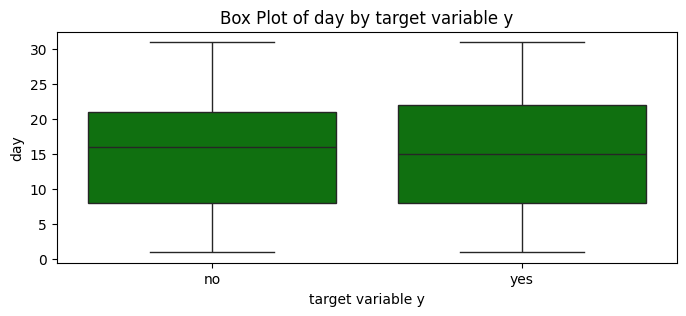

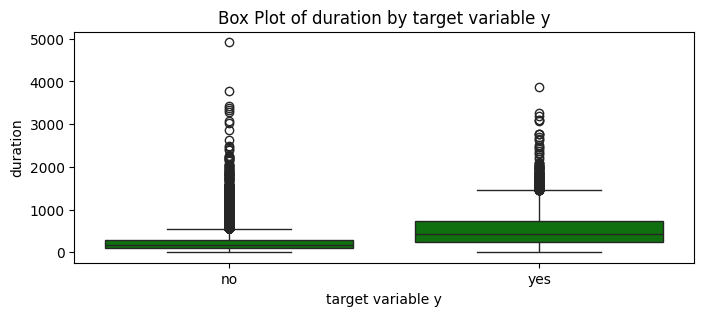

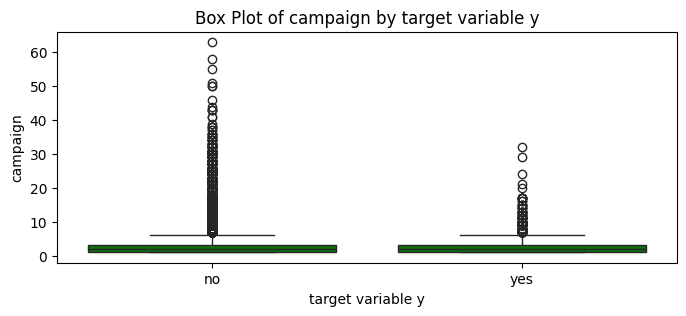

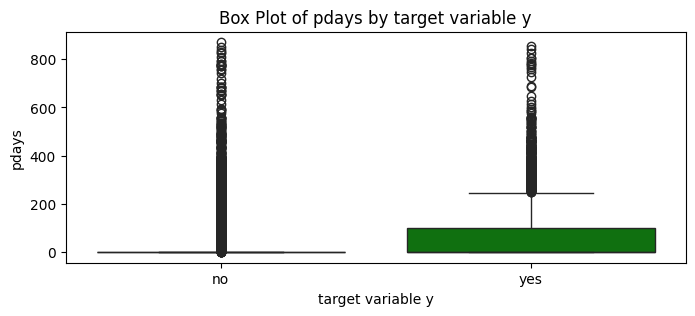

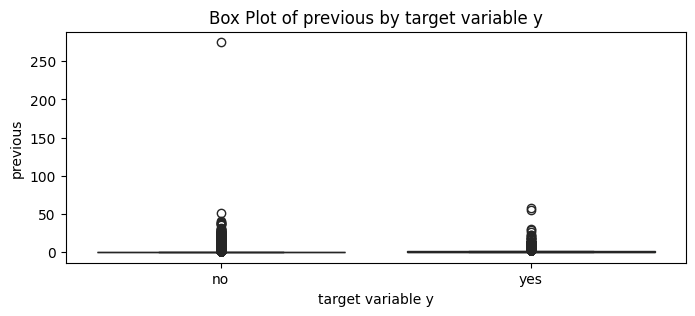

In [13]:
numerical_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for col in numerical_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x= 'y', y= col  ,data=df, color='green') 
    plt.title(f'Box Plot of {col} by dependent variable  variable y')
    plt.xlabel('dependent variable  variable y')
    plt.ylabel(col)
    plt.show()

##### Interpretation: Boxplots by y

- age:
  - The median age for clients who subscribed (y = yes) is slightly higher than for those who did not (y = no), but the difference is small overall.
  - The yes group shows a wider spread in ages, suggesting subscribers come from a broader age range.
  - Both groups have several older outliers (70s–90s), meaning a small number of very old clients appear in both outcomes.

- balance:
  -  The no group appears to have a wider spread and more extreme outliers than the yes group, although the typical (median) balances are quite similar.
 


- day :
  - The medians are very similar (around the middle of the month), and the spreads overlap a lot, so there is no strong difference between the two groups.
  - There are no clear outliers, and overall the “day” feature does not appear to strongly separate subscribers from non-subscribers.

- duration:
  -  The median duration is clearly higher for the “yes” group, meaning successful subscriptions are generally associated with longer calls.

  -  Both groups have many high-duration outliers, but overall the “yes” distribution is shifted upward.
  -  duration is a leaky feature because it is only known after the call. I exclude it to avoid unrealistically high model performance.

- campaign
  - The typical number of contacts is low in both groups (median around 2), so most clients were reached only a few times regardless of outcome.
  - The “no” group shows many more extreme outliers (very high contact counts), suggesting repeated calls often do not lead to subscription and may reflect   hard-to-convert clients.
  

- pdays
  - pdays is dominated by the special value -1 (never contacted before), especially in the no group.

  -  The yes group has more observations with pdays > -1, suggesting subscribers are more likely to have been contacted in a previous campaign.

- previous
  - There is heavy overlap in previous between subscribers and non-subscribers, since both groups are mostly at 0 and have similar typical ranges.

Refrences: 

  1.1010data. Bank Marketing Data Set. 1010data Documentation.
  
     https://docs.1010data.com/Tutorials/MachineLearningExamples/BankMarketingDataSet_2.html?utm_source=chatgpt.com

---

In [24]:
#Summary statistics for numerical columns
num_cols = df.select_dtypes(include=["number"]).columns
agg_map = {col: ["median", "mean", iqr] for col in num_cols}
summary = df.groupby("y").agg(agg_map).round(2)
summary.columns = [f"{col}_{stat}" for col, stat in summary.columns]

def stat(summary, stat: str):
    cols = [c for c in summary.columns if c.endswith(f"_{stat}")]
    out = summary[cols].copy()
    out.columns = [c.rsplit("_", 1)[0] for c in out.columns]   # drop _median suffix etc.
    return out

median_tbl = stat(summary, "median").reindex(["no","yes"])
mean_tbl   = stat(summary, "mean").reindex(["no","yes"])
iqr_tbl    = stat(summary, "iqr").reindex(["no","yes"])

print("Summary statistics for numerical columns:")

print(f'Medians:\n{median_tbl}')
print(f'Means:\n{mean_tbl}')
print(f'IQRs:\n{iqr_tbl}')

Summary statistics for numerical columns:
Medians:
      age  balance   day  duration  campaign  pdays  previous
y                                                            
no   39.0    417.0  16.0     164.0       2.0   -1.0       0.0
yes  38.0    733.0  15.0     426.0       2.0   -1.0       0.0
Means:
       age  balance    day  duration  campaign  pdays  previous
y                                                              
no   40.84  1303.71  15.89    221.18      2.85  36.42      0.50
yes  41.67  1804.27  15.16    537.29      2.14  68.70      1.17
IQRs:
      age  balance   day  duration  campaign  pdays  previous
y                                                            
no   15.0   1287.0  13.0     184.0       2.0    0.0       0.0
yes  19.0   1949.0  14.0     481.0       2.0   99.0       1.0


##### Summary statistics for numerical columns by dependent variable  (y)    

**Age**
  - Median: no = 39, yes = 38 very similar. 
  - Mean : slightly higher for yes. 
  - IQR = for subscribers are wider (19 vs 15)- subscribers have a slightly wider age spread.

**Balance**
-  Median: subscribers tend to have higher typical balances ( 733 vs 417).
  - Mean : supports higher balances for “yes” (skewed data), (1804 vs 1304).
  - IQR : balances vary more among subscribers (1949 vs 1287).


**Day**
-  Median: almost identical (16 vs 15).
  - Mean : small difference (15.16 vs 15.89).
  - IQR :similar spread ( 14 vs 13).

  **Duration**(leaky)
-  Median: much longer calls for subscribers(426 vs 164).
- Mean : subscribers are about two times higher (537 vs 221).
- IQR : subscribers are about two times higher  (481 vs 184).


**Campaign**
- Median: both 2 - typical contacts are similar.
- Mean : non-subscribers tend to get contacted more (2.85 vs 2.14).
- IQR : both 2 - most clients are within a narrow contact range.

**pdays**
- Media : both -1 - most clients were not previously contacted.
- Mean : among those with history, yes tends to have larger pdays (68.70 vs 36.42). 
- IQR : no = 0 (dominated by -1) vs yes = 99.

**Previous**
- Median: both 0, most clients had 0 prior contacts.
- Mean : subscribers slightly more likely to have prior contacts (1.17 vs 0.50).
   IQR : more variation for yes ; many zeros in no.
  
  
  
  

---


##### Countplots : Categorical Features by dependent variable (y)

These plots dispalys how each categorical variables breaks down by subscribed (yes)vs. not subscribed (no).

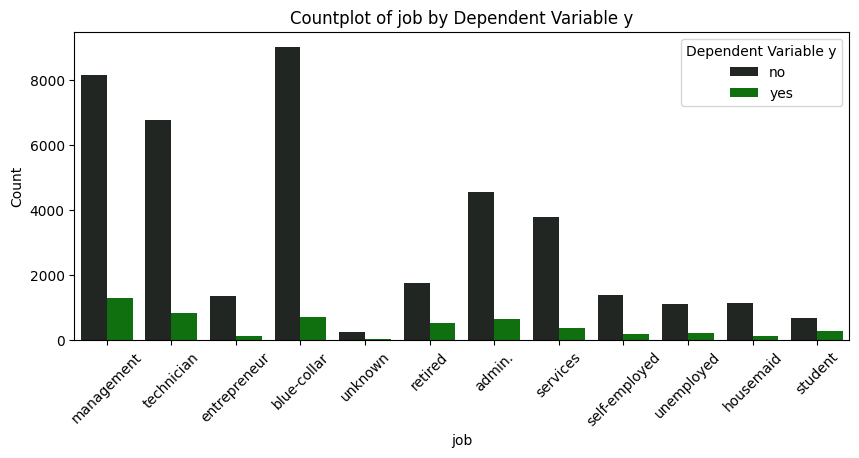

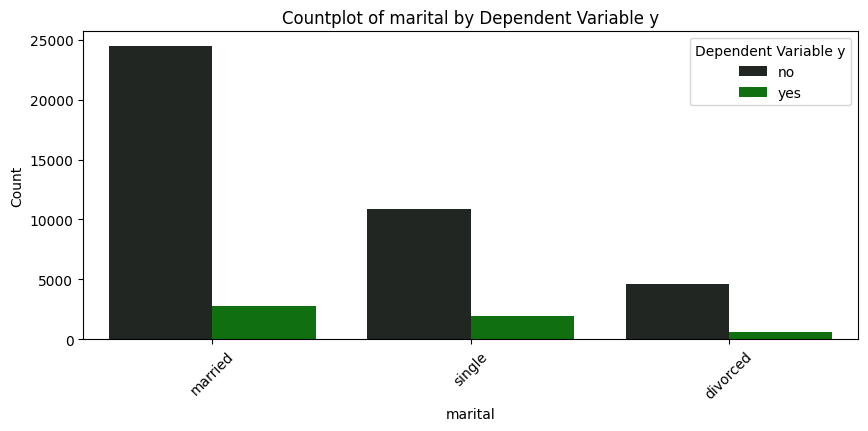

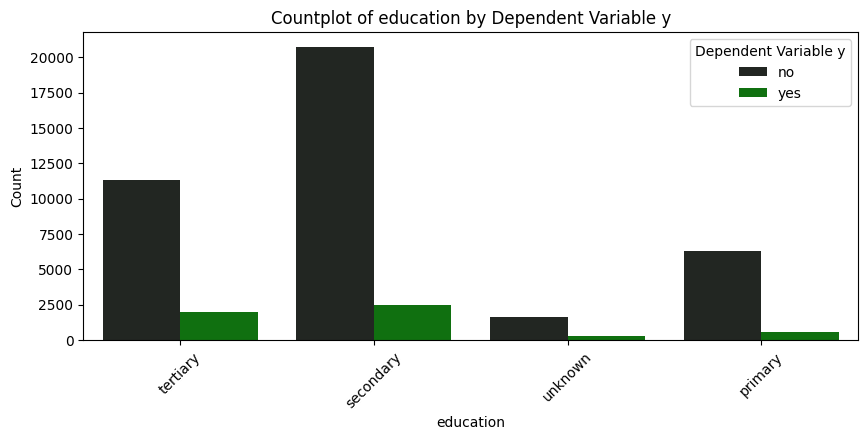

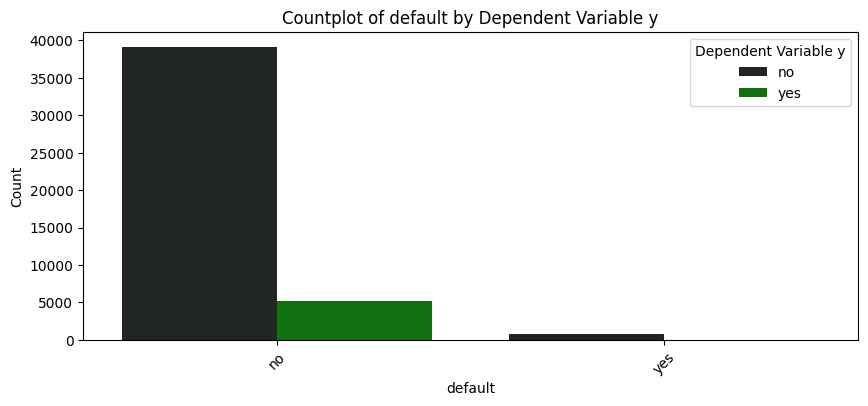

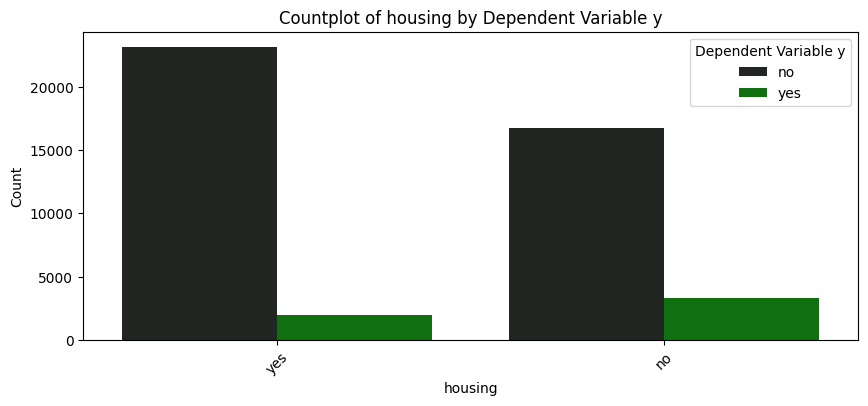

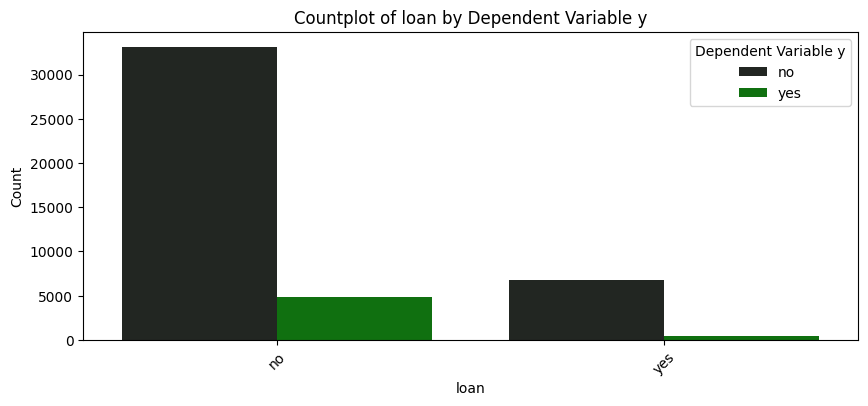

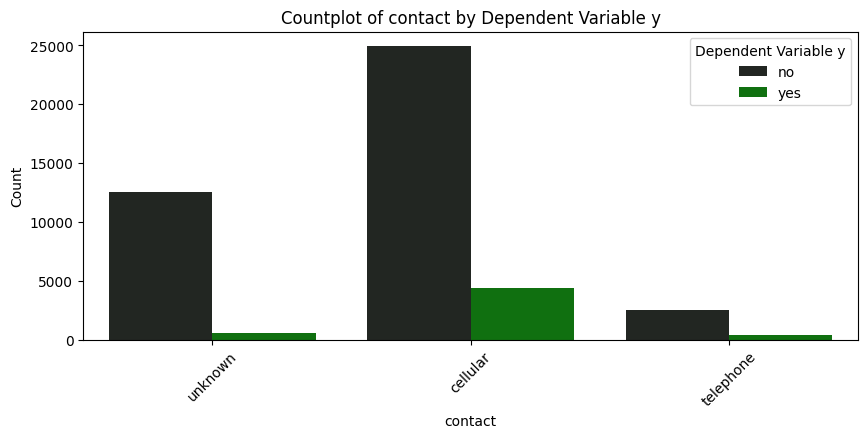

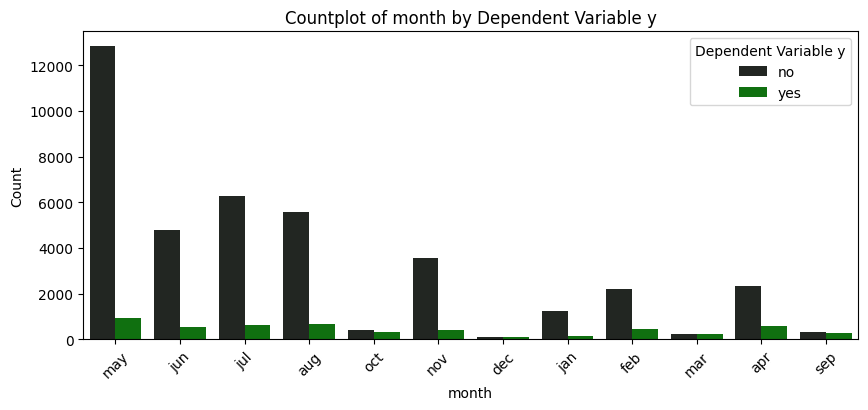

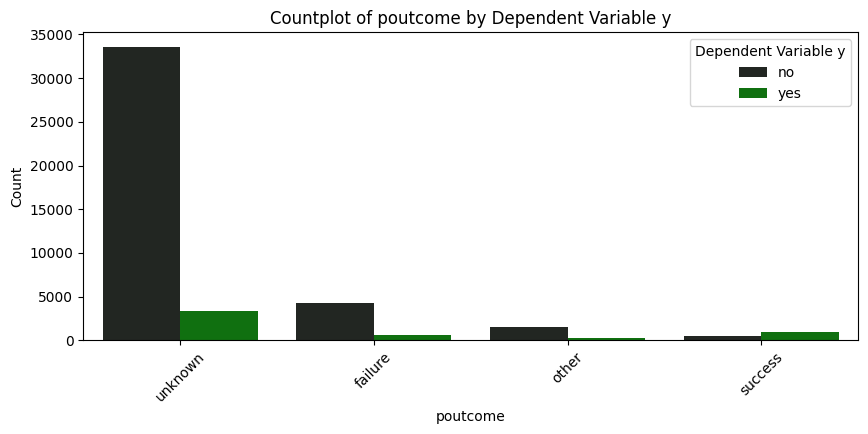

In [58]:
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='y', data=df, color='green')
    plt.title(f"Countplot of {col} by Dependent Variable y")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Dependent Variable y')
    plt.show()  


##### Quick Overlook
- Job: Management, technician, entrepreneur, and blue-collar are the largest job categories, and in each of these groups the ‘no’ count is much higher than ‘yes’. The retired group appears to have a more balanced split between ‘yes’ and ‘no’ compared to most other jobs.  

- Martial: Married clients have the highest number of subscribers in total (because they are the largest group). However, the single group shows a higher yes-to-no ratio, meaning “yes” is relatively more common among singles than among married or divorced clients.

- Education: Secondary education shows the highest number of subscribers.

- Default: Most clients are labeled default = no, meaning they are not in credit default. default = yes is extremely rare, so this feature is highly imbalanced and may have limited signal by itself.

- Housing: Clients without housing loans show a slightly higher tendency to subscribe.
 
- Loan : Most clients are in the no personal-loan group, so most ‘no’ outcomes come from that group.

- Contact: Cellular is the most common contact method and also has the highest number of ‘yes’ outcomes. Telephone and unknown have fewer subscriptions overall, and the unknown category is dominated by ‘no’.

- Month: Most calls (and most ‘no’ outcomes) happen in May–August, especially May; other months have much lower volumes, with fewer subscriptions as well.

- Poutcome: Most records have poutcome = unknown. When the previous campaign outcome was success, the share of ‘yes’ is noticeably higher than for failure or other

---


##### Handling "unknown" categories :

Several categorical features include "unknown" as a valid value (e.g., job, education, contact, poutcome). Rather than dropping these rows or guessing the missing value, I will keep "unknown" as its own category.

Why this approach:

- Keeps the full dataset (no loss of clients/records).

- Avoids making assumptions about why the value is missing.

- Allows the model to learn whether "unknown" itself is informative for predicting subscription.

- If later analysis shows "unknown" is not useful, it can be merged with another group or removed.

##### Example: One-hot encoding with “unknown”

During preprocessing, categorical variables will be converted using one-hot encoding, which creates a separate column for each category. For example, if education includes primary, secondary, tertiary, and unknown, one-hot encoding creates:

education_primary, education_secondary, education_tertiary, education_unknown

Each row will have a 1 in the column that matches its category, so “unknown” is treated like any other valid label. If needed later, the education_unknown column can be dropped without changing the rest of the pipeline.

---


##### Stacked (side-by-side) counts - categorical x y

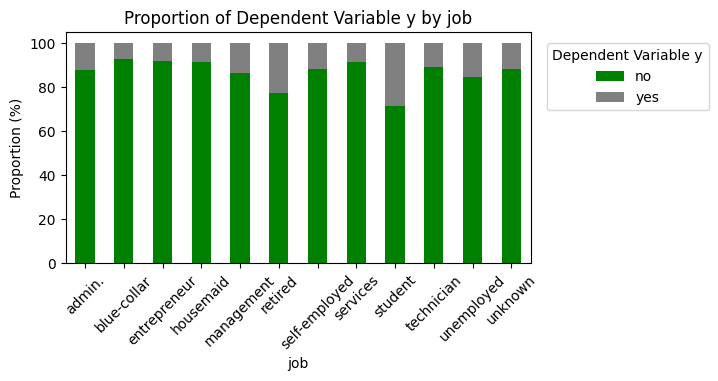

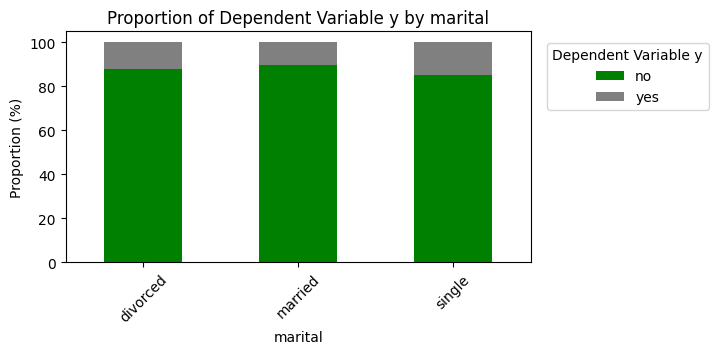

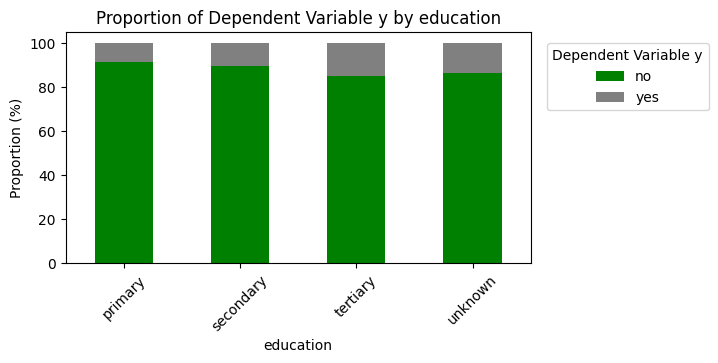

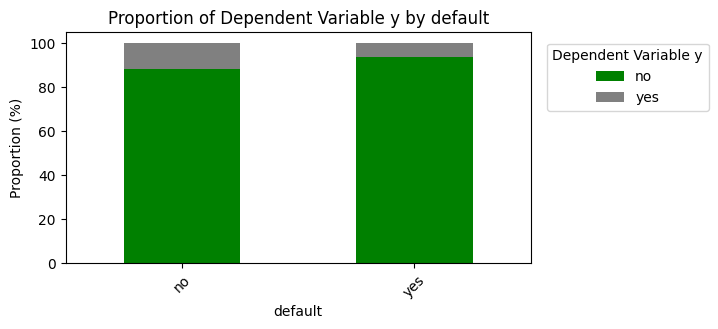

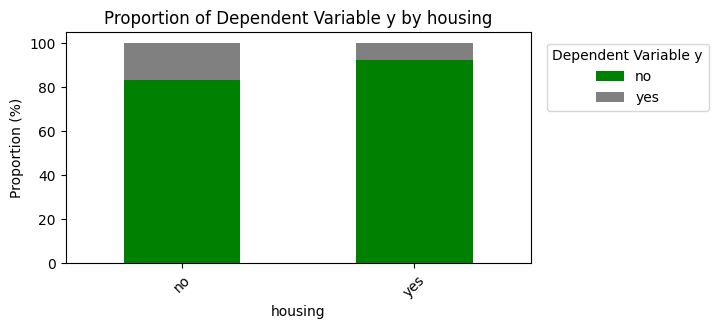

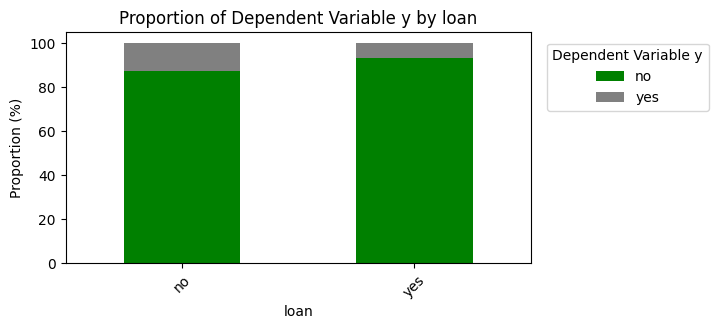

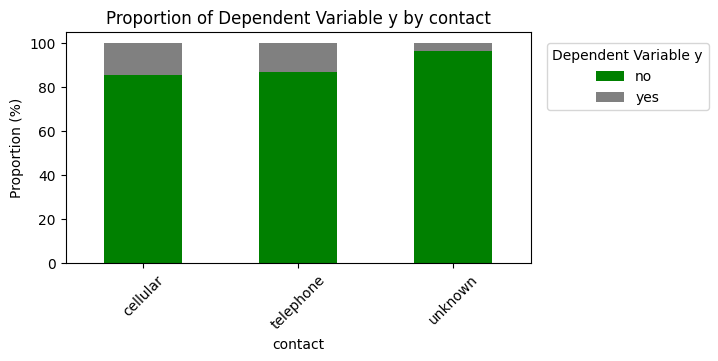

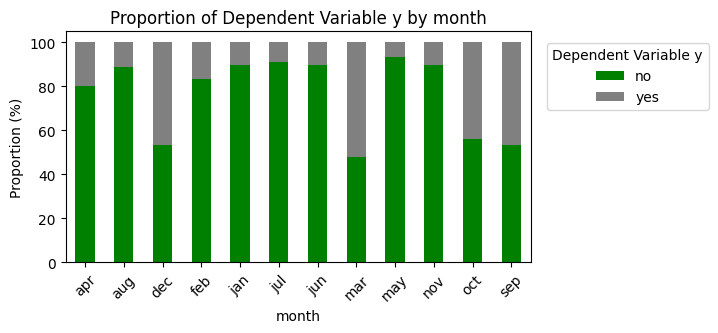

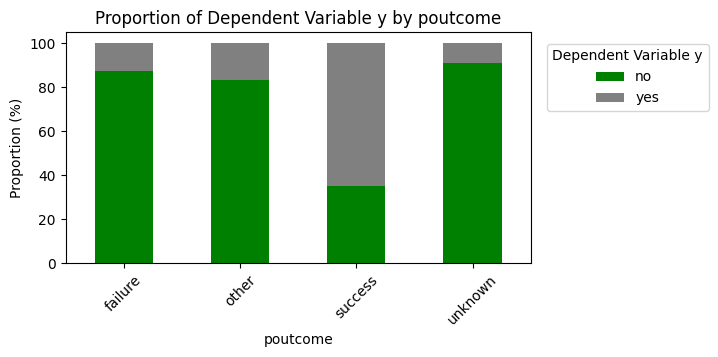

In [57]:
for col in categorical_cols:
    ctab = pd.crosstab(df[col], df["y"], normalize="index") * 100
    ctab.plot(kind="bar", stacked=True, figsize=(6, 3), color=['green', 'gray'])
    plt.title(f"Proportion of Dependent Variable y by {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion (%)")
    plt.xticks(rotation=45)
    plt.legend(title='Dependent Variable y', bbox_to_anchor=(1.02, 0.98), loc='upper left')
    plt.show()

##### Detaield Findings of Dependent Variable by Categorical Features
**Target Variable by Job**
- In every job category, “no” is the majority outcome, highlighting the class imbalance.
- The **imbalance is consistent** across job categories, with most bars heavily weighted toward “no,” although the “yes” share varies slightly.

 - Job may provide some predictive signal, but because the data is strongly skewed toward “no,” handling class imbalance (e.g., class weights or SMOTE) will be important during modeling.

 - Some job groups, such as **retired** and **student**, show a higher “yes” rate compared with groups like blue-collar and entrepreneur.

**Target Variable by martial**
- 'No' is the majority outcome across all marital categories, indicating class imbalance.
- The single group shows a slightly higher share of “yes” compared to married and divorced.

**Target Variable by education**
- 'No' dominates in every education group, but the share of “yes” is higher for tertiary and unknown than for primary and secondary (tertiary looks highest).

**Target Variable by default**
- Clients with default = no have a slightly higher “yes” subscription rate than clients with default = yes.
- Having a credit default is associated with a lower likelihood of subscribing to the term deposit.

**Target Variable by housing**
- Clients with housing = no have a slightly higher “yes” subscription proportion than clients with housing = yes.
- ven so, “no” remains the majority outcome in both housing-loan groups.


**Target Variable by loan**
- Clients without a personal loan show a higher subscription (“yes”) rate compared to clients with a loan, and the pattern is similar to the housing feature.


**Target Variable by cobtact**
- Cellular has the highest share of “yes” subscribers, telephone is slightly lower, and “unknown” has the lowest.

**Target Variable by month**
- Clear seasonality: March, September, and December show a higher share of “yes.”

- May and August are more heavily dominated by “no.”


**Target Variable by poutcome**

- A previous “success” outcome is strongly associated with a higher rate of “yes” subscriptions.

- Failure, other, and unknown outcomes are mostly “no”, so poutcome looks like one of the strongest categorical predictors.


##### Summary Insights: Dependent Variable by Categorical Features
 - After reviewing the categorical features, it is clear that most outcomes are “no” (not subscribed). This indicates a **strong class imbalance toward "no"**, which will need to be addressed during modeling.

 - These features show relatively stronger predictive signals than others:
   - **Putcome** is the most obvious one because 'success' strongly linked to 'yes'.
   - **Month** suggests seasonality, with some months (e.g., December, March, and September) showing higher “yes” rates.
   - **Contact Type** indicates that cellular is the most effective (and most commonly used) contact method.
  
- Financial features (**loan, housing, default**) suggest that clients with fewer debt obligations are slightly more likely to subscribe.

- Demographic features like **education** and **martial status** show only small differences across categories, and most categories still lean toward 'no'.



---

##### Dependebt variable Imbalance (y)
checking the distribution of the dependent variable (**yes vs no**)
These results reinforce the imbalance in y, suggesting SMOTE or class weighting may be necessary during modeling.

Class counts:
 y
no     39922
yes     5289
Name: count, dtype: int64
Class proportions (%):
 y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


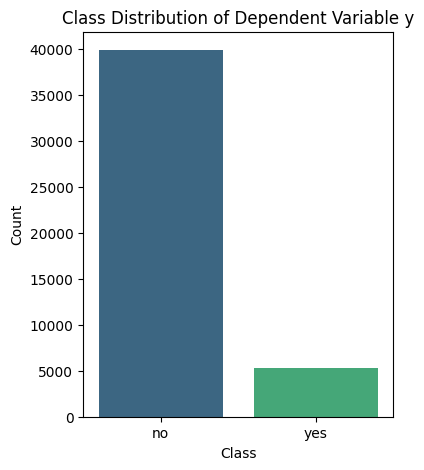

In [71]:
#Count values
class_count = df['y'].value_counts()
class_proportion = df['y'].value_counts(normalize=True) * 100
#print results
print("Class counts:\n", class_count)
print("Class proportions (%):\n", class_proportion)

#plot 
plt.figure(figsize=(4,5))
sns.barplot(x=class_count.index, y=class_count.values, palette='viridis',color='green')
plt.title('Class Distribution of Dependent Variable y') 
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

##### Results of Class Imbalance: 
The dataset is strongly imbalanced: “no” = 39,922 (88.3%) and “yes” = 5,289 (11.7%).
Because of this, a simple model could reach about 88% accuracy by predicting “no” for everyone.
So, we should consider imbalance-handling methods such as SMOTE, undersampling, or class weights to build a fairer model.

---